# SME0803 Visualização e Exploração de Dados

por Cibele Russo.




## Visualização de dados georreferenciados

Fonte: https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html



In [1]:
import pandas as pd

# Motivação: Como representar dados georreferenciados?

df = pd.read_csv("https://raw.githubusercontent.com/cibelerusso/VED/main/Dados/latitude-longitude-cidades.csv", sep=';', index_col=0)
df.head()


,uf,municipio,longitude,latitude
id_municipio,,,,
2,AC,Acrelândia,-66.897166,-9.825808
3,AC,Assis Brasil,-69.573794,-10.929765
4,AC,Brasiléia,-68.749696,-10.994994
5,AC,Bujari,-67.955029,-9.815277
6,AC,Capixaba,-67.686006,-10.566031


In [2]:
#!pip install geopandas
#!pip install geoplot

In [3]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

In [4]:
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})

In [5]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

In [6]:
print(gdf.head())

           City    Country  Latitude  Longitude                     geometry
0  Buenos Aires  Argentina    -34.58     -58.66  POINT (-58.66000 -34.58000)
1      Brasilia     Brazil    -15.78     -47.91  POINT (-47.91000 -15.78000)
2      Santiago      Chile    -33.45     -70.66  POINT (-70.66000 -33.45000)
3        Bogota   Colombia      4.60     -74.08    POINT (-74.08000 4.60000)
4       Caracas  Venezuela     10.48     -66.86   POINT (-66.86000 10.48000)


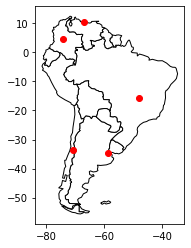

In [7]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')


plt.show()

In [8]:
import plotly.express as px
df = px.data.gapminder().query("year == 2007")
fig = px.scatter_geo(df, locations="iso_alpha",
                     size="pop", # size of markers, "pop" is one of the columns of gapminder
)
fig.show()

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/cibelerusso/VED/main/Dados/latitude-longitude-cidades.csv", sep=';', index_col=0)
df.head()

,uf,municipio,longitude,latitude
id_municipio,,,,
2,AC,Acrelândia,-66.897166,-9.825808
3,AC,Assis Brasil,-69.573794,-10.929765
4,AC,Brasiléia,-68.749696,-10.994994
5,AC,Bujari,-67.955029,-9.815277
6,AC,Capixaba,-67.686006,-10.566031


In [10]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.longitude, df.latitude))

gdf

,uf,municipio,longitude,latitude,geometry
id_municipio,,,,,
2,AC,Acrelândia,-66.897166,-9.825808,POINT (-66.89717 -9.82581)
3,AC,Assis Brasil,-69.573794,-10.929765,POINT (-69.57379 -10.92976)
4,AC,Brasiléia,-68.749696,-10.994994,POINT (-68.74970 -10.99499)
5,AC,Bujari,-67.955029,-9.815277,POINT (-67.95503 -9.81528)
6,AC,Capixaba,-67.686006,-10.566031,POINT (-67.68601 -10.56603)
...,...,...,...,...,...
5509,TO,Tocantínia,-48.374104,-9.563198,POINT (-48.37410 -9.56320)
5511,TO,Tupirama,-48.188324,-8.971676,POINT (-48.18832 -8.97168)
5512,TO,Tupiratins,-48.127744,-8.393880,POINT (-48.12774 -8.39388)


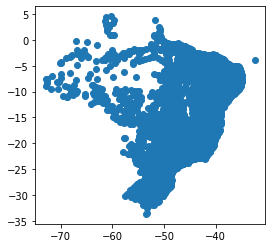

In [11]:
gdf.plot()

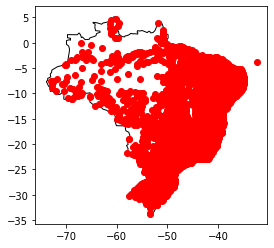

In [12]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# Com contorno do Brasil

ax = world[world.name == 'Brazil'].plot(color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

In [13]:
import geopandas
import geoplot

world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)
boroughs = geopandas.read_file(
    geoplot.datasets.get_path('nyc_boroughs')
)
collisions = geopandas.read_file(
    geoplot.datasets.get_path('nyc_injurious_collisions')
)

In [14]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.



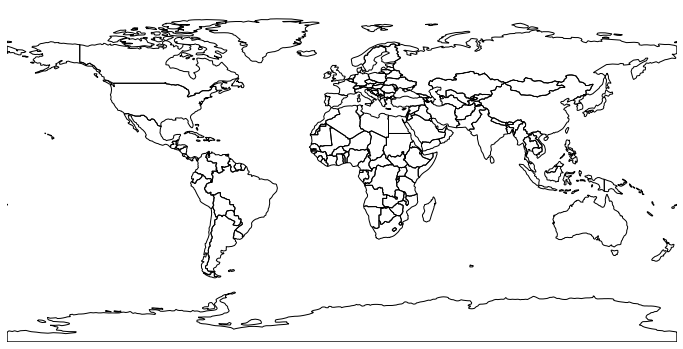

In [15]:
geoplot.polyplot(world, figsize=(12, 8))

Vamos avaliar alguns indicadores sócios-económicos (inflação, PIB per capita, Crescimento do PIB e desemprego) dos países no ano de 2018, disponíveis na base de dados do Banco Mundial, World_Bank.csv.

1. Descreva os dados utilizando ferramentas descritivas e exploratórias adequadas,observando a natureza das variáveis presentes no conjunto de dados.

2. Desenvolva um agrupamento hierárqico via dendrograma. Determine o número de clusters adequado. Justifique sua resposta, identificando qual foi o critério utilizado.

3. Considere um subconjunto dos dados com os seguintes países:
    Brasil, China, Uruguai, Paraguai, Chile, Peru, Bolívia, Equador, Colombia, Alemanha, Estados Unidos, Reino Unido, Polônia.

    Desenvolva analises de agrupamentos utilizando técnicas hierárquicas e não hierárquicas. Justifique adequadamente a escolha da quantidade de grupos.
    


## Agrupamento hierárquico via dendrograma

In [16]:
# ! pip install descartes

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
import geopandas

import warnings
warnings.filterwarnings('ignore')

sns.set()


In [18]:
df = pd.read_csv("https://raw.githubusercontent.com/cibelerusso/VED/main/Dados/World_Bank.csv",sep=' ')
df.head()

,inflacao,pib_per_capita,crescimento_pib,desemprego
United Arab Emirates,3.068147,43004.948646,1.423840,2.575
Albania,2.020790,5253.630064,4.004413,13.898
Armenia,2.520234,4212.070943,5.200000,17.712
Angola,20.190374,3432.385736,-2.133493,7.253
Austria,1.998382,51512.905475,2.729083,4.786


In [19]:
df.shape

(134, 4)

In [20]:
df.describe()

,inflacao,pib_per_capita,crescimento_pib,desemprego
count,134.000000,134.000000,134.000000,134.000000
mean,3.561733,17596.639838,3.408318,6.846358
std,3.797585,22718.772784,2.228776,5.373266
min,-2.814698,275.429603,-3.815710,0.142000
25%,1.507143,2564.751352,1.892515,3.373500
50%,2.517135,7253.779541,3.110311,5.324000
75%,4.283929,23128.944589,4.876709,8.891250
max,23.563515,114340.498742,8.671683,26.958000


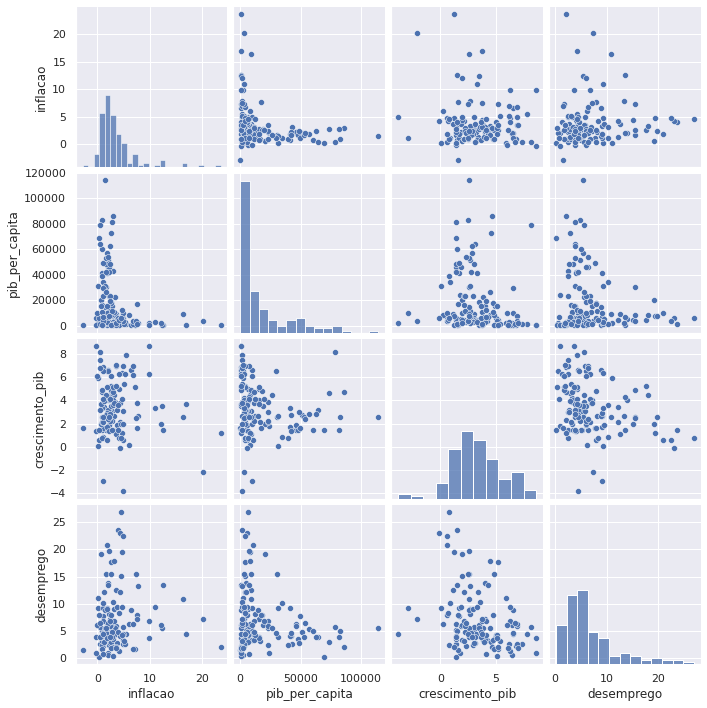

In [21]:
sns.pairplot(df)

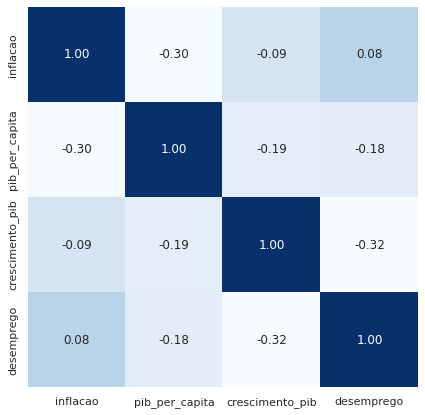

In [22]:
plt.figure(figsize=(7, 7))
corr = np.corrcoef(df.values, rowvar=False)
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f', cbar=False, xticklabels=df.columns, yticklabels=df.columns)

### Criando variável categórica a partir dos quartis da variável desemprego

In [23]:
df['desemprego'].describe()

count    134.000000
mean       6.846358
std        5.373266
min        0.142000
25%        3.373500
50%        5.324000
75%        8.891250
max       26.958000
Name: desemprego, dtype: float64

In [24]:
min=df['desemprego'].describe()[3]
Q1 = df['desemprego'].describe()[4]
Q2 = df['desemprego'].describe()[5]
Q3 = df['desemprego'].describe()[6]
max = df['desemprego'].describe()[7]

print(Q1,Q2,Q3)

3.37350004911423 5.324000120162965 8.891249895095825


In [25]:
df['desemprego_cat'] = pd.cut(df['desemprego'], bins=[min, Q1,Q2,Q3, max], labels=False)

In [26]:
df['desemprego_cat']

United Arab Emirates              0.0
Albania                           3.0
Armenia                           3.0
Angola                            2.0
Austria                           1.0
                                 ... 
St. Vincent and the Grenadines    3.0
Vietnam                           0.0
Samoa                             2.0
South Africa                      3.0
Zambia                            2.0
Name: desemprego_cat, Length: 134, dtype: float64

In [27]:
# Dados de paises com informações para plotar

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[['name', 'geometry']]


In [28]:
world

,name,geometry
0,Fiji,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Tanzania,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,W. Sahara,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...
172,Serbia,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,Montenegro,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,Kosovo,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,Trinidad and Tobago,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [29]:
# Alguns paises possuem nomes diferentes nos dois conjutos, estamos corrigindo isso
world.loc[world['name'] == 'Brunei', 'name'] = 'Brunei Darussalam'
world.loc[world['name'] == "Côte d'Ivoire", 'name'] = "Cote d'Ivoire"
world.loc[world['name'] == "Czechia", 'name'] = "Czech Republic"
world.loc[world['name'] == "Dominican Rep.", 'name'] = "Dominican Republic"
world.loc[world['name'] == "Gambia", 'name'] = "Gambia, The"
world.loc[world['name'] == "Guinea", 'name'] = "Equatorial Guinea"
world.loc[world['name'] == "Russia", 'name'] = "Russian Federation"
world.loc[world['name'] == "United States of America", 'name'] ="United States"

In [30]:
# Juntando os dois conjuntos
all_data = pd.merge(world, df.reset_index(), how='left', left_on='name', right_on='index')
all_data

,name,geometry,index,inflacao,pib_per_capita,crescimento_pib,desemprego,desemprego_cat
0,Fiji,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,4.079880,6202.162267,5.000000,4.152,1.0
1,Tanzania,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,3.494458,1050.675254,5.200000,1.932,0.0
2,W. Sahara,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN,NaN
3,Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,2.268226,46210.547623,1.878564,5.920,2.0
4,United States,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,2.442583,62641.014570,2.856988,3.933,1.0
...,...,...,...,...,...,...,...,...
172,Serbia,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Serbia,1.959841,7233.995874,4.301788,13.510,3.0
173,Montenegro,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",Montenegro,2.611216,8760.692286,4.854444,15.462,3.0
174,Kosovo,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN,NaN,NaN,NaN,NaN
175,Trinidad and Tobago,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN,NaN,NaN,NaN,NaN,NaN


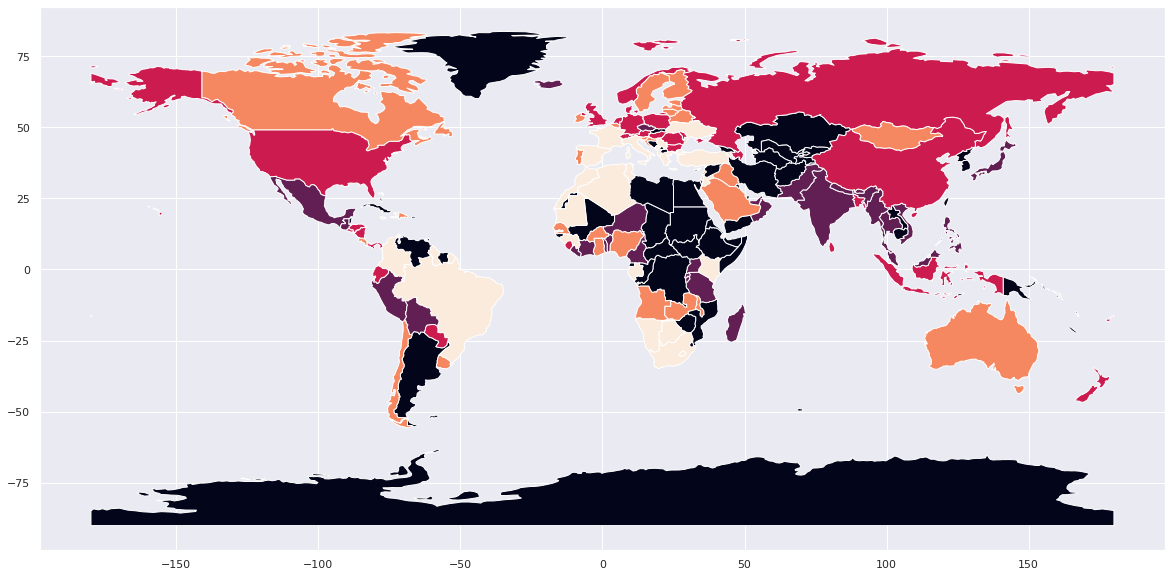

In [31]:
all_data1 = all_data

# Indicando os países que não temos dados (Serão plotados em preto)
all_data1.loc[:, 'desemprego_cat'] = all_data.loc[:, 'desemprego_cat'].fillna(-1)

# Plotando o gráfico
all_data1.plot(column='desemprego_cat', figsize=(28, 10));

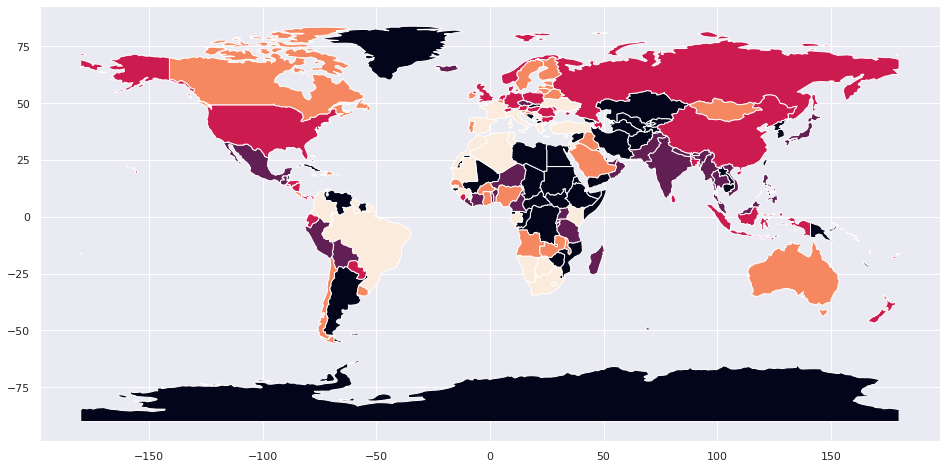

In [32]:
all_data2 = all_data

# Retirando os países que não temos dados (não serão plotados)
all_data2.loc[:, 'desemprego_cat'] = all_data.loc[:, 'desemprego_cat'].dropna()

# Plotando o gráfico
all_data2.plot(column='desemprego_cat', figsize=(18, 8));

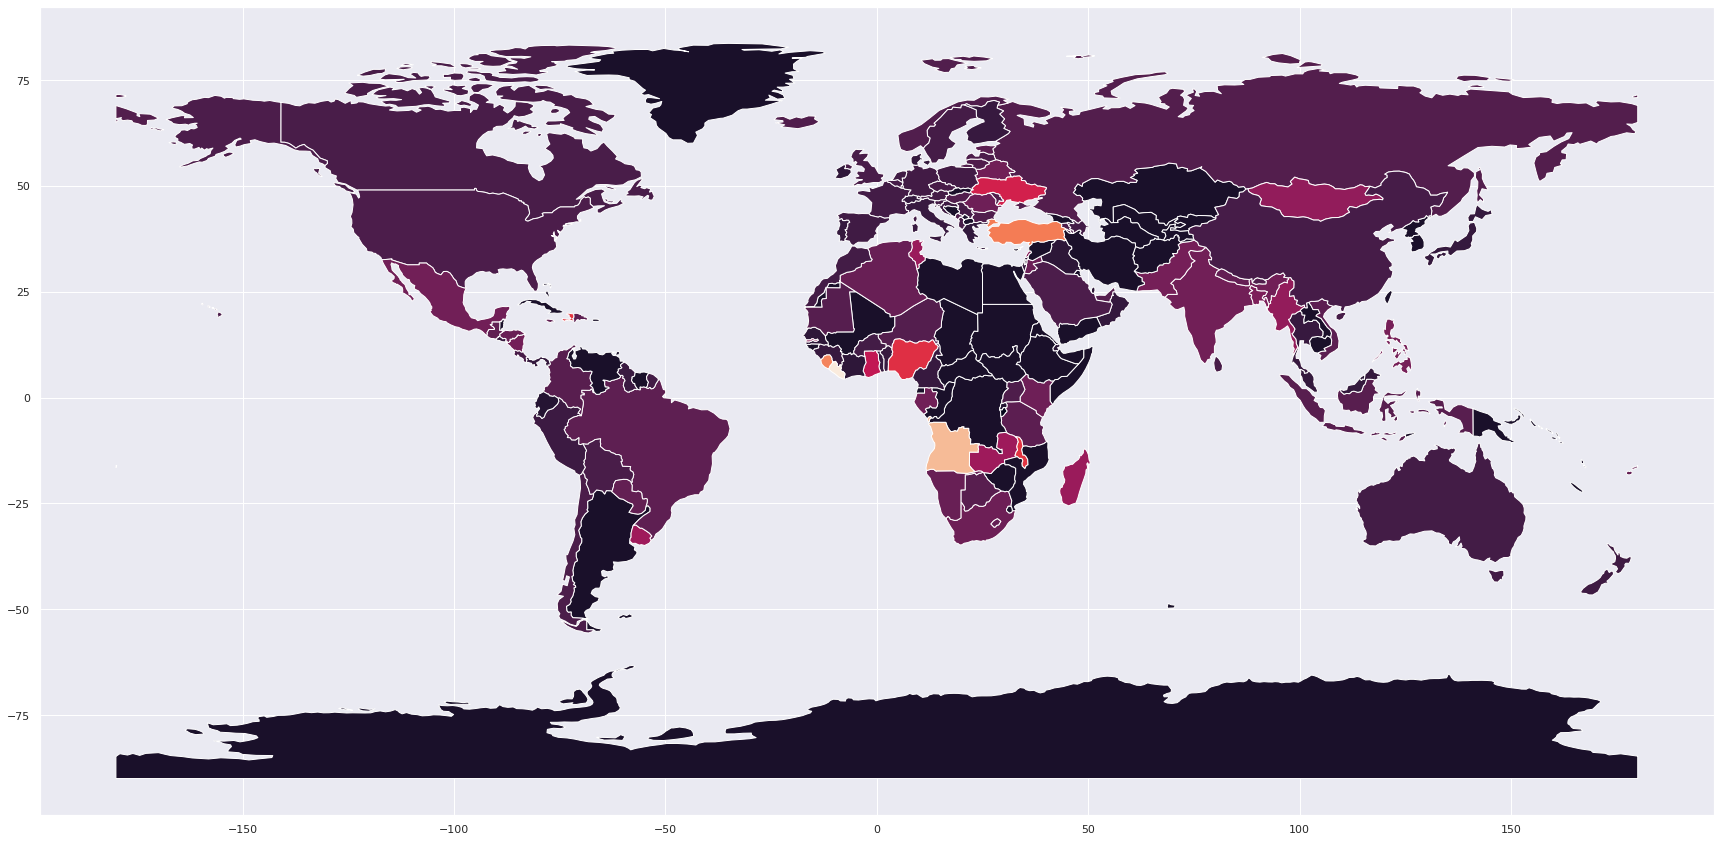

In [33]:
all_data1 = all_data

variável = 'inflacao'


# Indicando os países que não temos dados (Serão plotados em preto)
all_data1.loc[:, variável] = all_data.loc[:, variável].fillna(-1)

# Plotando o gráfico
all_data1.plot(column=variável, figsize=(30,20));

In [34]:
all_data

,name,geometry,index,inflacao,pib_per_capita,crescimento_pib,desemprego,desemprego_cat
0,Fiji,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,4.079880,6202.162267,5.000000,4.152,1.0
1,Tanzania,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,3.494458,1050.675254,5.200000,1.932,0.0
2,W. Sahara,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,-1.000000,NaN,NaN,NaN,-1.0
3,Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,2.268226,46210.547623,1.878564,5.920,2.0
4,United States,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,2.442583,62641.014570,2.856988,3.933,1.0
...,...,...,...,...,...,...,...,...
172,Serbia,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Serbia,1.959841,7233.995874,4.301788,13.510,3.0
173,Montenegro,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",Montenegro,2.611216,8760.692286,4.854444,15.462,3.0
174,Kosovo,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,-1.000000,NaN,NaN,NaN,-1.0
175,Trinidad and Tobago,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN,-1.000000,NaN,NaN,NaN,-1.0


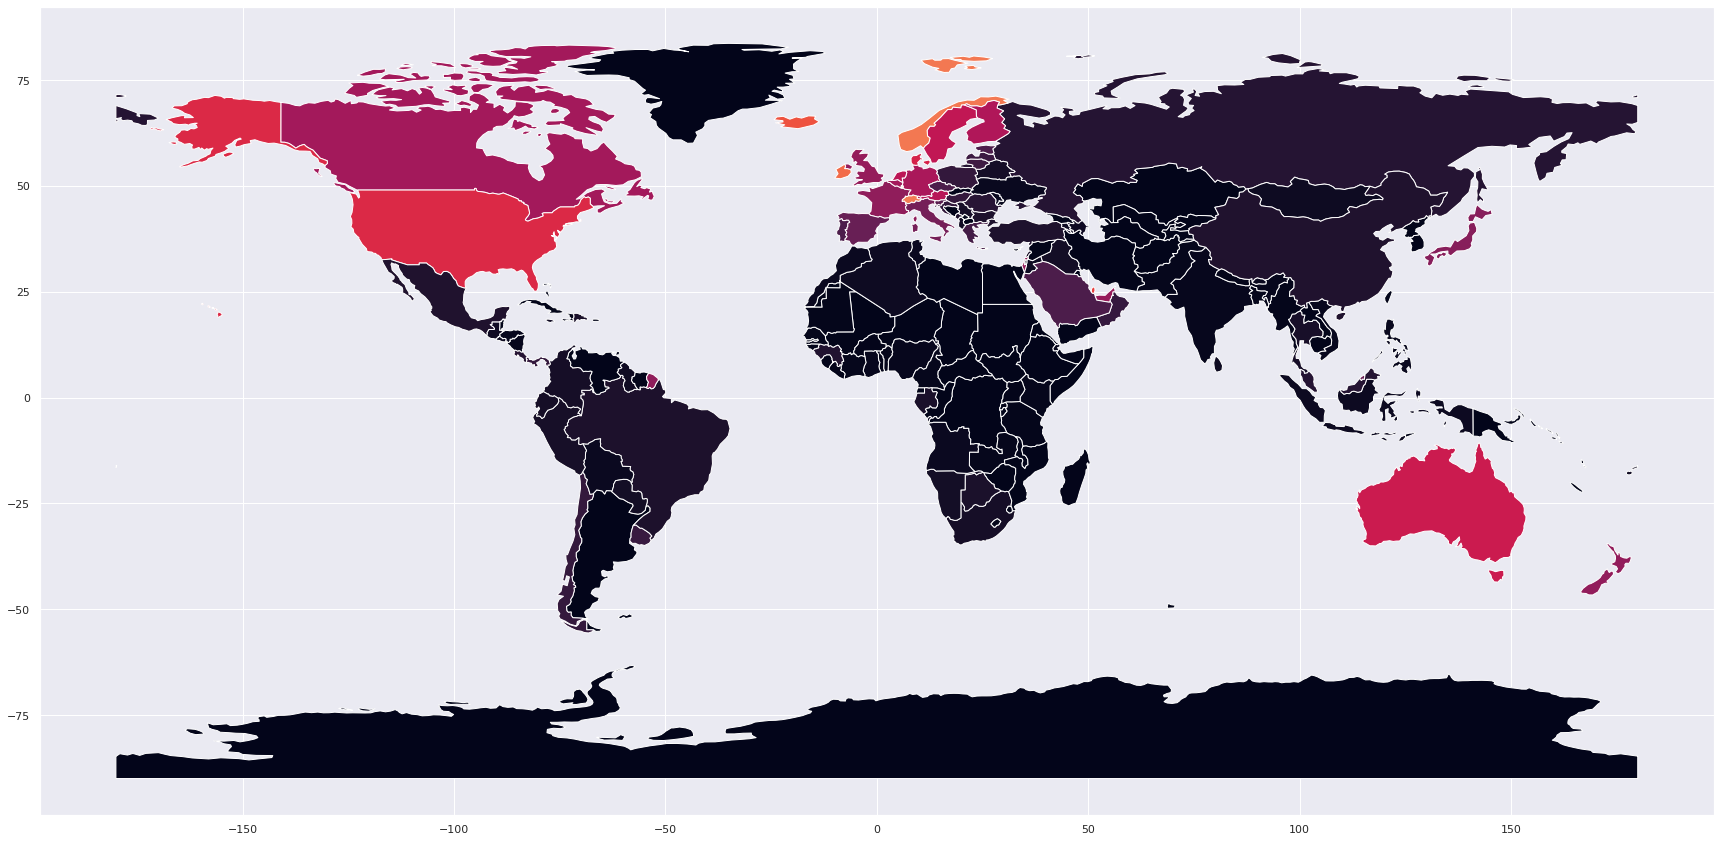

In [35]:
all_data1 = all_data

variável = 'pib_per_capita'


# Indicando os países que não temos dados (Serão plotados em preto)
all_data1.loc[:, variável] = all_data.loc[:, variável].fillna(-1)

# Plotando o gráfico
all_data1.plot(column=variável, figsize=(30,15));